In [155]:
import itertools
import openturns as ot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dependence.tests import func_sum
from dependence.tests.test_functions import func_cum_sum_weight, func_spec
from dependence import ConservativeEstimate
from dependence import quantile_func
from dependence import iterative_vine_minimize
from dependence.dependence_plot import matrix_plot_input, matrix_plot_quantities
from dependence.dependence_plot import plot_iterative_results

%matplotlib inline
%load_ext autoreload
%autoreload 2

random_state = 12
np.random.seed(random_state)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [190]:
dim = 8
margins = []
for i in range(dim):
    margins.append(ot.Normal(0, dim - 0.5*(i+1)))
    
margins[0] = ot.Normal(-2, 1.)
alpha = 0.05
q_func = quantile_func(alpha)
families = np.tril(np.ones((dim, dim)), k=1)

In [197]:
n_influencial_pairs = 2
val_influencial = 1.
val_non_influencial = 0.0
corr_dim = int(dim * (dim-1)/2)

all_pairs = np.asarray(list(itertools.combinations(range(dim), 2)))
selected_pairs = all_pairs[np.random.choice(range(corr_dim), size=n_influencial_pairs, replace=False)]
selected_pairs = np.asarray([[0, dim-2], [0, dim-3], [1, dim-4], [2, dim-5]])
#selected_pairs = all_pairs

power = np.zeros((dim, dim))
for i in range(1, dim):
    for j in range(i):
        if [j, i] in selected_pairs.tolist():
            print([i, j])
            power[i, j] = val_influencial
        else:
            power[i, j] = val_non_influencial
test_func = lambda x: func_cum_sum_weight(x, power)
print(power)

[3, 2]
[4, 1]
[5, 0]
[6, 0]
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


In [192]:
n = 10000
quant_estimate = ConservativeEstimate(model_func=test_func, margins=margins, families=families)
indep_result = quant_estimate.independence(n_input_sample=n, q_func=q_func, random_state=random_state)
print(indep_result.quantity)

84.8592244320289


In [177]:
algorithm_parameters = {
    "n_input_sample": n,
    "n_dep_param_init": 20,
    "max_n_pairs": 1,
    "grid_type": 'lhs',
    "q_func": q_func,
    "n_add_pairs": 1,
    "n_remove_pairs": 0,
    "adapt_vine_structure": True,
    "with_bootstrap": False,
    "verbose": False,
    "iterative_save": False,
    "iterative_load": False,
    "load_input_samples": False,
    "keep_input_samples": False
}

iterative_results = iterative_vine_minimize(estimate_object=quant_estimate, **algorithm_parameters)


Iteration 1: selected pair: (6, 1)
Total number of evaluations = 5600000. Minimum quantity at 25.54.

Max number of pairs reached


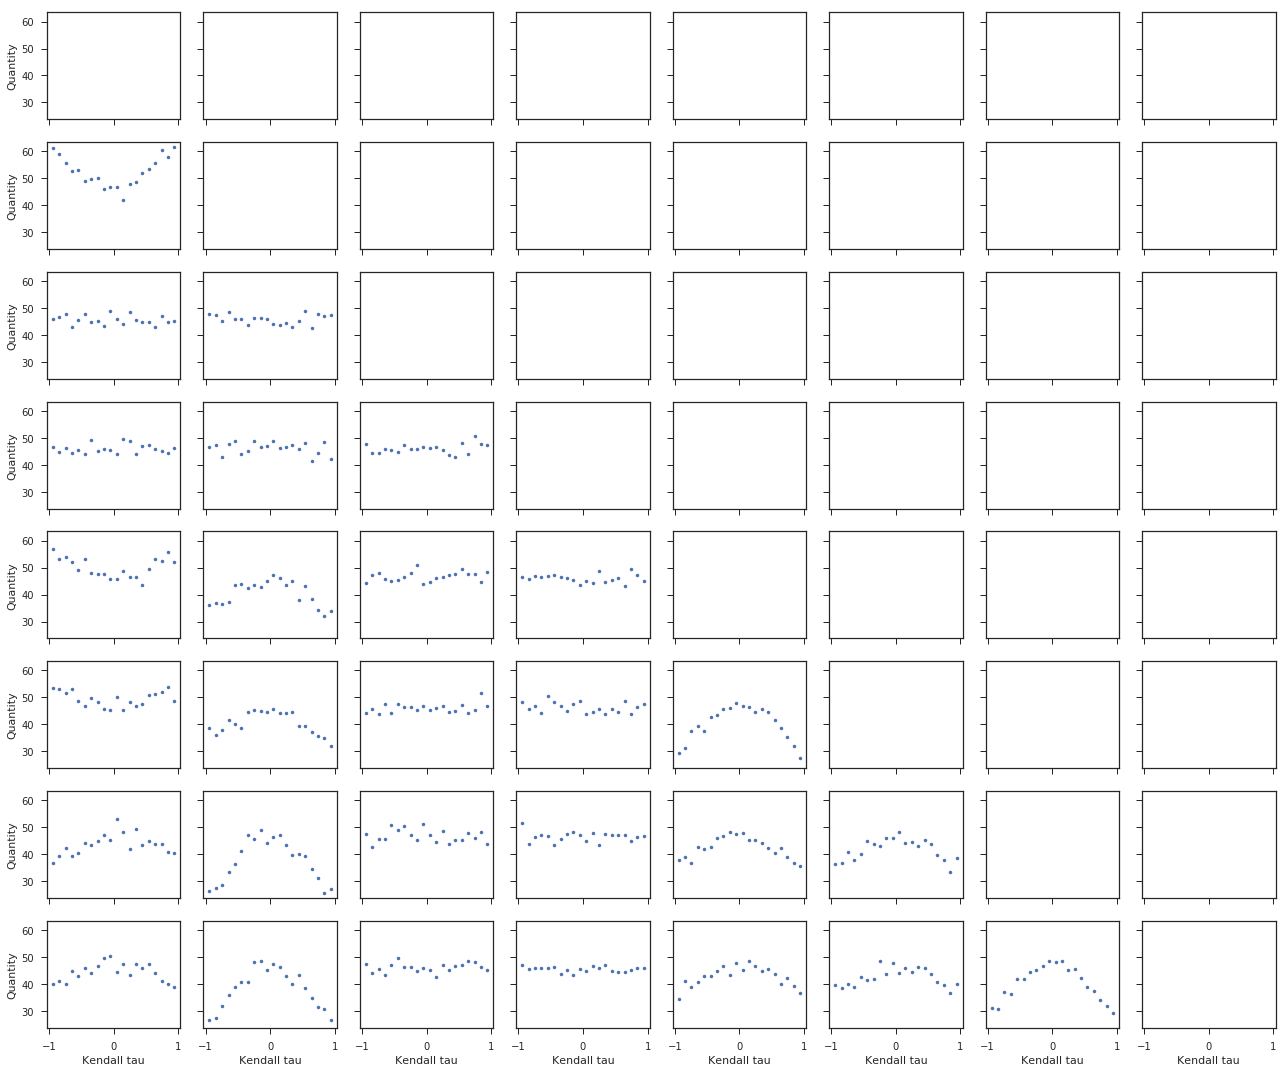

In [179]:
results = iterative_results[0]
matrix_plot_quantities(results, figsize=(18, 15))
# plt.savefig('output/matrix_plot.png')

In [201]:
algorithm_parameters = {
    "n_input_sample": 1000,
    "n_dep_param_init": 10,
    "max_n_pairs": 5,
    "grid_type": 'lhs',
    "q_func": q_func,
    "delta": 0.1,
    "n_add_pairs": 2,
    "n_remove_pairs": 3,
    "adapt_vine_structure": True,
    "with_bootstrap": False,
    "verbose": True,
    "iterative_save": False,
    "iterative_load": False,
    "load_input_samples": False,
    "keep_input_samples": False
}

quant_estimate = ConservativeEstimate(model_func=test_func, margins=margins, families=families)

iterative_results = iterative_vine_minimize(estimate_object=quant_estimate, **algorithm_parameters)

n=1000. Worst quantile of [(1, 0)] at 72.34140404932873
n=1000. Worst quantile of [(2, 0)] at 79.28249067255854
n=1000. Worst quantile of [(2, 1)] at 60.222176579589735
n=1000. Worst quantile of [(3, 0)] at 85.09723442813771
n=1000. Worst quantile of [(3, 1)] at 57.88861984341227
n=1000. Worst quantile of [(3, 2)] at 72.33800003480458
n=1000. Worst quantile of [(4, 0)] at 82.73009850073846
n=1000. Worst quantile of [(4, 1)] at 68.29671338392599
n=1000. Worst quantile of [(4, 2)] at 52.37751256663547
n=1000. Worst quantile of [(4, 3)] at 59.886992367556786
n=1000. Worst quantile of [(5, 0)] at 68.97396445248556
n=1000. Worst quantile of [(5, 1)] at 59.86536389962493
n=1000. Worst quantile of [(5, 2)] at 62.128816716599964
n=1000. Worst quantile of [(5, 3)] at 75.7632526046555
n=1000. Worst quantile of [(5, 4)] at 66.71968636064477
n=1000. Worst quantile of [(6, 0)] at 71.20248321777979
n=1000. Worst quantile of [(6, 1)] at 68.93004541693368
n=1000. Worst quantile of [(6, 2)] at 65.06218

IndexError: list index out of range

In [199]:
K = 100
grid_type = 'lhs'
grid_results_lhs = quant_estimate.gridsearch(n_dep_param=K, n_input_sample=10000, grid_type=grid_type, q_func=q_func)
min_result = grid_results_lhs.min_result
min_result.quantity

7.115704035982777

In [ ]:
from dependence.dependence_plot import matrix_plot_input
matrix_plot_input(min_result, margins=margins)

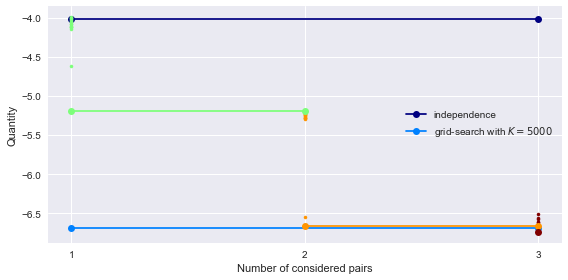

In [21]:
plot_iterative_results(iterative_results, indep_result=indep_result, grid_results=grid_results_lhs, q_func=q_func)
plt.savefig('./output/iterative_result_with_grid_%d.pdf' % (K))
plt.savefig('./output/iterative_result_with_grid_%d.png' % (K))

In [18]:
K = 200
grid_type = 'vertices'
grid_results_vertices = quant_estimate.gridsearch(n_dep_param=K, n_input_sample=n, grid_type=grid_type, q_func=q_func)
min_result_vertices = grid_results_vertices.min_result
min_result_vertices.quantity

-6.717148183862132